# Сборный проект

Нам предоставлены данные за 2016 год интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Также в открытых источниках мы можем найти исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Задача - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Цель исследования

- оценить игры (топ 5) для разных континентов
- определить самые популярные игры на разных платформах
- выявить факторы, определяющие успешность игры

## Ход исследования

1. О качестве данных ничего не известно, поэтому первым этапом произведем первоначальную оценку данных, пропусков и дупликатов.
2. После этого уже можно будет приступать к самому анализу данных


## Шаг 1. Откроем файл с данными и изучим общую информацию

In [16]:
import pandas as pd
pd.set_option('display.max_columns', None)
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as ticker
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [17]:
try:
    data = pd.read_csv('C:/Users/Home/Documents/Яндекс/Сатанист/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [18]:
# сбор данных о датафрейме:
def data_info(data):
    print(f'''
    ----------------------------------------
    Первые строки датафрейма:
    ----------------------------------------''')
    display(data.head())
    print(f'''
    ----------------------------------------
    Последние строки датафрейма:
    ----------------------------------------''')
    display(data.tail())
    print(f'''
    ----------------------------------------
    Общая информация:
    ----------------------------------------''')
    print(data.info())
    print(f'''
    ----------------------------------------
    Дупликаты:
    ----------------------------------------''')
    print(data.duplicated().sum())
    print(f'''
    ----------------------------------------
    Пропуски:
    ----------------------------------------''')
    display(round(data.isna().sum(),))
    print(f'''
    ----------------------------------------
    И немного статистических данных:
    ----------------------------------------''')
    print(data.describe(include='all'))

In [19]:
data_info(data)


    ----------------------------------------
    Первые строки датафрейма:
    ----------------------------------------


Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN


    ----------------------------------------
    Последние строки датафрейма:
    ----------------------------------------


Name Platform  Year_of_Release       Genre  \
16710  Samurai Warriors: Sanada Maru      PS3           2016.0      Action   
16711               LMA Manager 2007     X360           2006.0      Sports   
16712        Haitaka no Psychedelica      PSV           2016.0   Adventure   
16713               Spirits & Spells      GBA           2003.0    Platform   
16714            Winning Post 8 2016      PSV           2016.0  Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
16710      0.00      0.00      0.01          0.0           NaN        NaN   
16711      0.00      0.01      0.00          0.0           NaN        NaN   
16712      0.00      0.00      0.01          0.0           NaN        NaN   
16713      0.01      0.00      0.00          0.0           NaN        NaN   
16714      0.00      0.00      0.01          0.0           NaN        NaN   

      Rating  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN


    ----------------------------------------
    Общая информация:
    ----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

    ----------------------------------------
    Дупликаты:
    ----------------------------------------
0

    ----------

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


    ----------------------------------------
    И немного статистических данных:
    ----------------------------------------
                               Name Platform  Year_of_Release   Genre  \
count                         16713    16715     16446.000000   16713   
unique                        11559       31              NaN      12   
top     Need for Speed: Most Wanted      PS2              NaN  Action   
freq                             12     2161              NaN    3369   
mean                            NaN      NaN      2006.484616     NaN   
std                             NaN      NaN         5.877050     NaN   
min                             NaN      NaN      1980.000000     NaN   
25%                             NaN      NaN      2003.000000     NaN   
50%                             NaN      NaN      2007.000000     NaN   
75%                             NaN      NaN      2010.000000     NaN   
max                             NaN      NaN      2016.000000     NaN

В таблице у нас представлены 11 колонок:

- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales* — продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Дупликатов нет, и это прекрасно. Пропуски в названии игры - что то странное, появиться могли или из-за ошибки системы, или из-за человеческого фактора (если данные вносились человеком)

In [20]:
data[data['Name'].isna()]

Name Platform  Year_of_Release Genre  NA_sales  EU_sales  JP_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       Other_sales  Critic_Score User_Score Rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

Однако, как оказалось, пропуски у названия и жанра в одних и тех же строчках, и других данных там практически нет, поэтому не имеет смысла учитывать эти строки (тем более что они 1993 года, а нас интересует исключительно 2016)

In [21]:
data = data[data['Name'].notna()]

In [22]:
data[data['Year_of_Release'].isna()]

Name Platform  Year_of_Release  \
183                      Madden NFL 2004      PS2              NaN   
377                     FIFA Soccer 2004      PS2              NaN   
456           LEGO Batman: The Videogame      Wii              NaN   
475           wwe Smackdown vs. Raw 2006      PS2              NaN   
609                       Space Invaders     2600              NaN   
...                                  ...      ...              ...   
16373  PDC World Championship Darts 2008      PSP              NaN   
16405                      Freaky Flyers       GC              NaN   
16448                          Inversion       PC              NaN   
16458        Hakuouki: Shinsengumi Kitan      PS3              NaN   
16522                       Virtua Quest       GC              NaN   

              Genre  NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  \
183          Sports      4.26      0.26      0.01         0.71          94.0   
377          Sports      0.59      2.36      0.04         0.51          84.0   
456          Action      1.80      0.97      0.00         0.29          74.0   
475        Fighting      1.57      1.02      0.00         0.41           NaN   
609         Shooter      2.36      0.14      0.00         0.03           NaN   
...             ...       ...       ...       ...          ...           ...   
16373        Sports      0.01      0.00      0.00         0.00          43.0   
16405        Racing      0.01      0.00      0.00         0.00          69.0   
16448       Shooter      0.01      0.00      0.00         0.00          59.0   
16458     Adventure      0.01      0.00      0.00         0.00           NaN   
16522  Role-Playing      0.01      0.00      0.00         0.00          55.0   

      User_Score Rating  
183          8.5      E  
377          6.4      E  
456          7.9   E10+  
475          NaN    NaN  
609          NaN    NaN  
...          ...    ...  
16373        tbd   E10+  
16405        6.5      T  
16448        6.7      M  
16458        NaN    NaN  
16522        5.5      T  

[269 rows x 11 columns]

Смотрим далее, пропуски в году выпуска - возможно, это получится переписать вручную, но надо посмотреть, имеет ли это смысл, если (допустим) это игры **не 2016 года** и проще будет их опустить (так как их меньше 2 процентов), либо заполнить нулем

## Шаг 2. Подготовим данные

### Замените названия столбцов (приведите к нижнему регистру)

Первым делом приведем колонки к принятому неймингу:

In [23]:
data.columns= data.columns.str.lower()
data = data.rename(columns={'year_of_release':'year'})
data

name platform    year         genre  na_sales  \
0                         Wii Sports      Wii  2006.0        Sports     41.36   
1                  Super Mario Bros.      NES  1985.0      Platform     29.08   
2                     Mario Kart Wii      Wii  2008.0        Racing     15.68   
3                  Wii Sports Resort      Wii  2009.0        Sports     15.61   
4           Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing     11.27   
...                              ...      ...     ...           ...       ...   
16710  Samurai Warriors: Sanada Maru      PS3  2016.0        Action      0.00   
16711               LMA Manager 2007     X360  2006.0        Sports      0.00   
16712        Haitaka no Psychedelica      PSV  2016.0     Adventure      0.00   
16713               Spirits & Spells      GBA  2003.0      Platform      0.01   
16714            Winning Post 8 2016      PSV  2016.0    Simulation      0.00   

       eu_sales  jp_sales  other_sales  critic_score user_score rating  
0         28.96      3.77         8.45          76.0          8      E  
1          3.58      6.81         0.77           NaN        NaN    NaN  
2         12.76      3.79         3.29          82.0        8.3      E  
3         10.93      3.28         2.95          80.0          8      E  
4          8.89     10.22         1.00           NaN        NaN    NaN  
...         ...       ...          ...           ...        ...    ...  
16710      0.00      0.01         0.00           NaN        NaN    NaN  
16711      0.01      0.00         0.00           NaN        NaN    NaN  
16712      0.00      0.01         0.00           NaN        NaN    NaN  
16713      0.00      0.00         0.00           NaN        NaN    NaN  
16714      0.00      0.01         0.00           NaN        NaN    NaN  

[16713 rows x 11 columns]

In [24]:
data = data[data['year'].notna()]
data

name platform    year         genre  na_sales  \
0                         Wii Sports      Wii  2006.0        Sports     41.36   
1                  Super Mario Bros.      NES  1985.0      Platform     29.08   
2                     Mario Kart Wii      Wii  2008.0        Racing     15.68   
3                  Wii Sports Resort      Wii  2009.0        Sports     15.61   
4           Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing     11.27   
...                              ...      ...     ...           ...       ...   
16710  Samurai Warriors: Sanada Maru      PS3  2016.0        Action      0.00   
16711               LMA Manager 2007     X360  2006.0        Sports      0.00   
16712        Haitaka no Psychedelica      PSV  2016.0     Adventure      0.00   
16713               Spirits & Spells      GBA  2003.0      Platform      0.01   
16714            Winning Post 8 2016      PSV  2016.0    Simulation      0.00   

       eu_sales  jp_sales  other_sales  critic_score user_score rating  
0         28.96      3.77         8.45          76.0          8      E  
1          3.58      6.81         0.77           NaN        NaN    NaN  
2         12.76      3.79         3.29          82.0        8.3      E  
3         10.93      3.28         2.95          80.0          8      E  
4          8.89     10.22         1.00           NaN        NaN    NaN  
...         ...       ...          ...           ...        ...    ...  
16710      0.00      0.01         0.00           NaN        NaN    NaN  
16711      0.01      0.00         0.00           NaN        NaN    NaN  
16712      0.00      0.01         0.00           NaN        NaN    NaN  
16713      0.00      0.00         0.00           NaN        NaN    NaN  
16714      0.00      0.01         0.00           NaN        NaN    NaN  

[16444 rows x 11 columns]

Все оставшиеся пропуски не думаю, что нужно заполнять, разве только что нулем или значением-маркером, т.к. может быть не просто "не указана оценка", а "её в целом нет".

In [25]:
data['year'] = pd.to_datetime(data['year'], format='%Y')
data['year'] = pd.DatetimeIndex(data['year']).year
data

name platform  year         genre  na_sales  \
0                         Wii Sports      Wii  2006        Sports     41.36   
1                  Super Mario Bros.      NES  1985      Platform     29.08   
2                     Mario Kart Wii      Wii  2008        Racing     15.68   
3                  Wii Sports Resort      Wii  2009        Sports     15.61   
4           Pokemon Red/Pokemon Blue       GB  1996  Role-Playing     11.27   
...                              ...      ...   ...           ...       ...   
16710  Samurai Warriors: Sanada Maru      PS3  2016        Action      0.00   
16711               LMA Manager 2007     X360  2006        Sports      0.00   
16712        Haitaka no Psychedelica      PSV  2016     Adventure      0.00   
16713               Spirits & Spells      GBA  2003      Platform      0.01   
16714            Winning Post 8 2016      PSV  2016    Simulation      0.00   

       eu_sales  jp_sales  other_sales  critic_score user_score rating  
0         28.96      3.77         8.45          76.0          8      E  
1          3.58      6.81         0.77           NaN        NaN    NaN  
2         12.76      3.79         3.29          82.0        8.3      E  
3         10.93      3.28         2.95          80.0          8      E  
4          8.89     10.22         1.00           NaN        NaN    NaN  
...         ...       ...          ...           ...        ...    ...  
16710      0.00      0.01         0.00           NaN        NaN    NaN  
16711      0.01      0.00         0.00           NaN        NaN    NaN  
16712      0.00      0.01         0.00           NaN        NaN    NaN  
16713      0.00      0.00         0.00           NaN        NaN    NaN  
16714      0.00      0.01         0.00           NaN        NaN    NaN  

[16444 rows x 11 columns]

Как было сказано в данных проекта - у нас есть значение *tbd* в колонке с оценкой пользователей. Из английского языка это расшифровывается, как *'to be determined'* - "будет оценено". 

In [26]:
data[data['user_score']=='tbd']

name platform  year       genre  na_sales  \
119                     Zumba Fitness      Wii  2010      Sports      3.45   
301    Namco Museum: 50th Anniversary      PS2  2005        Misc      2.08   
520                   Zumba Fitness 2      Wii  2011      Sports      1.51   
645                      uDraw Studio      Wii  2010        Misc      1.65   
718                   Just Dance Kids      Wii  2010        Misc      1.52   
...                               ...      ...   ...         ...       ...   
16695                 Planet Monsters      GBA  2001      Action      0.01   
16697                Bust-A-Move 3000       GC  2003      Puzzle      0.01   
16698                Mega Brain Boost       DS  2008      Puzzle      0.01   
16704                        Plushees       DS  2008  Simulation      0.01   
16706   Men in Black II: Alien Escape       GC  2003     Shooter      0.01   

       eu_sales  jp_sales  other_sales  critic_score user_score rating  
119        2.59       0.0         0.66           NaN        tbd      E  
301        1.35       0.0         0.54          61.0        tbd   E10+  
520        1.03       0.0         0.27           NaN        tbd      T  
645        0.57       0.0         0.20          71.0        tbd      E  
718        0.54       0.0         0.18           NaN        tbd      E  
...         ...       ...          ...           ...        ...    ...  
16695      0.00       0.0         0.00          67.0        tbd      E  
16697      0.00       0.0         0.00          53.0        tbd      E  
16698      0.00       0.0         0.00          48.0        tbd      E  
16704      0.00       0.0         0.00           NaN        tbd      E  
16706      0.00       0.0         0.00           NaN        tbd      T  

[2376 rows x 11 columns]

При том, что таких показателей у нас целых 2+ тысячи, просто опустить мы их не можем. Так как эта оценка означает, что оценка еще не выставлена, можно поставить их значением, которое оценка в принципе принимать не может - `-1` или `np.nan`, чтобы они если и отображались, то отдельной колонкой

In [28]:
data.loc[data['user_score']=='tbd','user_score'] = np.nan
data

name platform  year         genre  na_sales  \
0                         Wii Sports      Wii  2006        Sports     41.36   
1                  Super Mario Bros.      NES  1985      Platform     29.08   
2                     Mario Kart Wii      Wii  2008        Racing     15.68   
3                  Wii Sports Resort      Wii  2009        Sports     15.61   
4           Pokemon Red/Pokemon Blue       GB  1996  Role-Playing     11.27   
...                              ...      ...   ...           ...       ...   
16710  Samurai Warriors: Sanada Maru      PS3  2016        Action      0.00   
16711               LMA Manager 2007     X360  2006        Sports      0.00   
16712        Haitaka no Psychedelica      PSV  2016     Adventure      0.00   
16713               Spirits & Spells      GBA  2003      Platform      0.01   
16714            Winning Post 8 2016      PSV  2016    Simulation      0.00   

       eu_sales  jp_sales  other_sales  critic_score user_score rating  
0         28.96      3.77         8.45          76.0          8      E  
1          3.58      6.81         0.77           NaN        NaN    NaN  
2         12.76      3.79         3.29          82.0        8.3      E  
3         10.93      3.28         2.95          80.0          8      E  
4          8.89     10.22         1.00           NaN        NaN    NaN  
...         ...       ...          ...           ...        ...    ...  
16710      0.00      0.01         0.00           NaN        NaN    NaN  
16711      0.01      0.00         0.00           NaN        NaN    NaN  
16712      0.00      0.01         0.00           NaN        NaN    NaN  
16713      0.00      0.00         0.00           NaN        NaN    NaN  
16714      0.00      0.01         0.00           NaN        NaN    NaN  

[16444 rows x 11 columns]

Таким образом после того, как мы убрали значения tbd (которые на момент создания таблицы с данными не были определены) колонку *user_score* спокойно можно переделать в тип float и строить различные графики по данным, которые у нас есть.

In [29]:
data['user_score'] = data['user_score'].astype('float64')

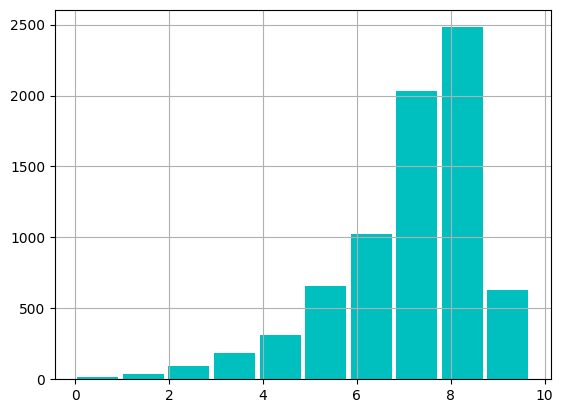

In [30]:
data['user_score'].hist(color='c',rwidth=0.9);

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16444 non-null  object 
 1   platform      16444 non-null  object 
 2   year          16444 non-null  int64  
 3   genre         16444 non-null  object 
 4   na_sales      16444 non-null  float64
 5   eu_sales      16444 non-null  float64
 6   jp_sales      16444 non-null  float64
 7   other_sales   16444 non-null  float64
 8   critic_score  7983 non-null   float64
 9   user_score    7463 non-null   float64
 10  rating        9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Промежуточный вывод:

После предобработки данных, мы избавились от пропусков непонятного характера (пропуски в столбце *name*), обработали пропуски в году выпуска (т.к. там их было менее 2% - удалили), после чего мы смогли привести данные столбца *year* к нужному нам типу и в дальнейшем - строить графики по распределению по годам, и разобрались со значениями *"tbd"* в колонке с оценками пользователей.

## Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

Также добавим колонку с общими продажами:

In [33]:
data['all_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data

name platform  year         genre  na_sales  \
0                         Wii Sports      Wii  2006        Sports     41.36   
1                  Super Mario Bros.      NES  1985      Platform     29.08   
2                     Mario Kart Wii      Wii  2008        Racing     15.68   
3                  Wii Sports Resort      Wii  2009        Sports     15.61   
4           Pokemon Red/Pokemon Blue       GB  1996  Role-Playing     11.27   
...                              ...      ...   ...           ...       ...   
16710  Samurai Warriors: Sanada Maru      PS3  2016        Action      0.00   
16711               LMA Manager 2007     X360  2006        Sports      0.00   
16712        Haitaka no Psychedelica      PSV  2016     Adventure      0.00   
16713               Spirits & Spells      GBA  2003      Platform      0.01   
16714            Winning Post 8 2016      PSV  2016    Simulation      0.00   

       eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0         28.96      3.77         8.45          76.0         8.0      E   
1          3.58      6.81         0.77           NaN         NaN    NaN   
2         12.76      3.79         3.29          82.0         8.3      E   
3         10.93      3.28         2.95          80.0         8.0      E   
4          8.89     10.22         1.00           NaN         NaN    NaN   
...         ...       ...          ...           ...         ...    ...   
16710      0.00      0.01         0.00           NaN         NaN    NaN   
16711      0.01      0.00         0.00           NaN         NaN    NaN   
16712      0.00      0.01         0.00           NaN         NaN    NaN   
16713      0.00      0.00         0.00           NaN         NaN    NaN   
16714      0.00      0.01         0.00           NaN         NaN    NaN   

       all_sales  
0          82.54  
1          40.24  
2          35.52  
3          32.77  
4          31.38  
...          ...  
16710       0.01  
16711       0.01  
16712       0.01  
16713       0.01  
16714       0.01  

[16444 rows x 12 columns]

### Промежуточный вывод:

После создания колонки с общими продажами по всему миру у нас появляются различные возможности по созданию графиков, зависимостей и схем, например, мы можем посчитать, какая самая продаваемая игра за все представленное время по всему миру.

## Шаг 3. Проведите исследовательский анализ данных

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Первоначально, посмотрим, какой у нас диапозон лет и сколько игр выпускалось с эти года:

In [34]:
data.pivot_table(index='year', values = 'genre', aggfunc='count')

genre
year       
1980      9
1981     46
1982     36
1983     17
1984     14
1985     14
1986     21
1987     16
1988     15
1989     17
1990     16
1991     41
1992     43
1993     60
1994    121
1995    219
1996    263
1997    289
1998    379
1999    338
2000    350
2001    482
2002    829
2003    775
2004    762
2005    939
2006   1006
2007   1197
2008   1427
2009   1426
2010   1255
2011   1136
2012    653
2013    544
2014    581
2015    606
2016    502

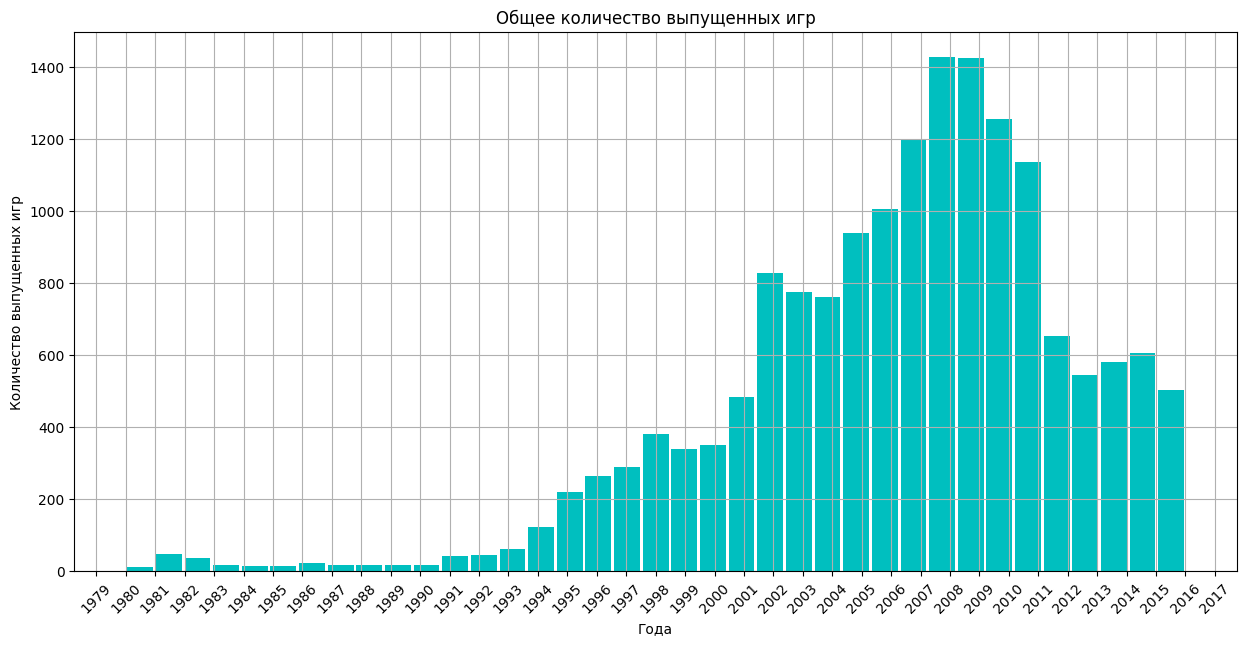

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.hist(x=data['year'],bins=len(data['year'].unique()),color='c', rwidth=0.9)
fig.set_figwidth(15)    
fig.set_figheight(7)
plt.grid(True)
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('Общее количество выпущенных игр')
plt.xlabel('Года')
plt.ylabel('Количество выпущенных игр')
plt.show()


plt.show()

Исходя из данных таблицы и графика видно, что с 1994 количество игр стало увеличиваться, и пик приходится на 2007-2011. Также интересно, что произошло в 2002 году - показатели для того времени можно назвать локальным пиком. До 1994 года количество выпущенных игр достаточно мало, так что думаю, эти показатели нас не интересуют. Давайте посмотрим, какие платформы - самые популярные среди игроков:

#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

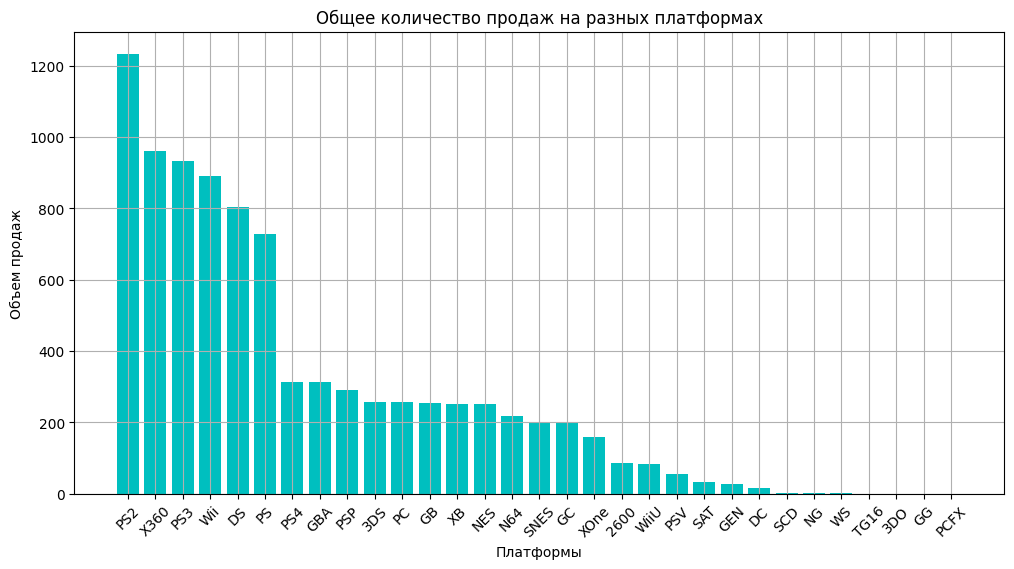

In [37]:
x1 = data.groupby('platform')[['all_sales']].sum().sort_values('all_sales',ascending=False)
x = x1.index
y = x1['all_sales']

fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(x, y, color='c')

fig.set_figwidth(12)    
fig.set_figheight(6)
plt.xticks(rotation=45)
plt.title('Общее количество продаж на разных платформах')
plt.xlabel('Платформы')
plt.ylabel('Объем продаж')
plt.grid()
plt.show()

На графике очень четко видно разделение на самые популярные платформы и "другие"

In [38]:
data.groupby('platform')[['all_sales']].sum().sort_values('all_sales',ascending=False).head(10)

all_sales
platform           
PS2         1233.56
X360         961.24
PS3          931.34
Wii          891.18
DS           802.78
PS           727.58
PS4          314.14
GBA          312.88
PSP          289.53
3DS          257.81

По таблице видно, что 6 самых популярных платформ - **PS2,X360, PS3, Wii, DS, PS**. Построим распределение по годам

In [39]:
a = ['PS2','X360','PS3','Wii','DS','PS']

In [40]:
data.query('platform in @a').pivot_table(index='platform',columns='year',values='all_sales',aggfunc='sum').fillna('-')

year      1985  1994   1995  1996    1997    1998    1999   2000    2001  \
platform                                                                   
DS        0.02     -      -     -       -       -       -      -       -   
PS           -  6.03  35.96  94.7  136.17  169.49  144.53  96.37   35.59   
PS2          -     -      -     -       -       -       -  39.17  166.43   
PS3          -     -      -     -       -       -       -      -       -   
Wii          -     -      -     -       -       -       -      -       -   
X360         -     -      -     -       -       -       -      -       -   

year        2002    2003    2004    2005    2006    2007    2008    2009  \
platform                                                                   
DS             -       -   17.27  130.14  119.81  146.94  145.31  119.54   
PS          6.67    2.07       -       -       -       -       -       -   
PS2       205.38  184.31  211.81  160.66  103.42   75.99    53.9    26.4   
PS3            -       -       -       -   20.96   73.19  118.52  130.93   
Wii            -       -       -       -  137.15  152.77  171.32  206.97   
X360           -       -       -    8.25   51.62   95.41  135.26  120.29   

year        2010    2011    2012    2013   2014   2015  2016  
platform                                                      
DS         85.02   26.18   11.01    1.54      -      -     -  
PS             -       -       -       -      -      -     -  
PS2         5.64    0.45       -       -      -      -     -  
PS3       142.17  156.78  107.36  113.25  47.76  16.82   3.6  
Wii       127.95   59.65   21.71    8.59   3.75   1.14  0.18  
X360      170.03  143.84   99.74   88.58  34.74  11.96  1.52

На этой сводной таблице наглядно видно, когда какая либо из перечисленных платформ приобретала популярность, а когда теряла. В период с 2006  по 2013 - самое большое количество платформ (я бы назвала это пиком в мире по популярности игр и развитии технологий). Также видно, что в среднем платформа "живет" 10 лет.

In [41]:
data.pivot_table(index='platform',columns='year',values='all_sales',aggfunc='sum').fillna('-')

year       1980   1981   1982   1983   1984   1985   1986   1987   1988  \
platform                                                                  
2600      11.38  35.68  28.88   5.84   0.27   0.45   0.67   1.94   0.74   
3DO           -      -      -      -      -      -      -      -      -   
3DS           -      -      -      -      -      -      -      -      -   
DC            -      -      -      -      -      -      -      -      -   
DS            -      -      -      -      -   0.02      -      -      -   
GB            -      -      -      -      -      -      -      -   1.43   
GBA           -      -      -      -      -      -      -      -      -   
GC            -      -      -      -      -      -      -      -      -   
GEN           -      -      -      -      -      -      -      -      -   
GG            -      -      -      -      -      -      -      -      -   
N64           -      -      -      -      -      -      -      -      -   
NES           -      -      -  10.96  50.08  53.44  36.41  19.76  45.01   
NG            -      -      -      -      -      -      -      -      -   
PC            -      -      -      -      -   0.04      -      -   0.03   
PCFX          -      -      -      -      -      -      -      -      -   
PS            -      -      -      -      -      -      -      -      -   
PS2           -      -      -      -      -      -      -      -      -   
PS3           -      -      -      -      -      -      -      -      -   
PS4           -      -      -      -      -      -      -      -      -   
PSP           -      -      -      -      -      -      -      -      -   
PSV           -      -      -      -      -      -      -      -      -   
SAT           -      -      -      -      -      -      -      -      -   
SCD           -      -      -      -      -      -      -      -      -   
SNES          -      -      -      -      -      -      -      -      -   
TG16          -      -      -      -      -      -      -      -      -   
WS            -      -      -      -      -      -      -      -      -   
Wii           -      -      -      -      -      -      -      -      -   
WiiU          -      -      -      -      -      -      -      -      -   
X360          -      -      -      -      -      -      -      -      -   
XB            -      -      -      -      -      -      -      -      -   
XOne          -      -      -      -      -      -      -      -      -   

year       1989   1990   1991   1992   1993   1994   1995   1996    1997  \
platform                                                                   
2600       0.63      -      -      -      -      -      -      -       -   
3DO           -      -      -      -      -   0.02   0.08      -       -   
3DS           -      -      -      -      -      -      -      -       -   
DC            -      -      -      -      -      -      -      -       -   
DS            -      -      -      -      -      -      -      -       -   
GB        64.97   4.89   5.57  25.49      -  12.18    3.6  36.03    6.37   
GBA           -      -      -      -      -      -      -      -       -   
GC            -      -      -      -      -      -      -      -       -   
GEN           -    2.6   4.33  12.64   0.65   8.13      -      -       -   
GG            -      -      -   0.04      -      -      -      -       -   
N64           -      -      -      -      -      -      -   34.1    39.5   
NES        7.85  15.73   6.11   1.98   3.61   0.11      -      -       -   
NG            -      -      -      -   0.21    0.8   0.33    0.1       -   
PC            -      -      -   3.03      -  12.87   4.22  10.58   11.27   
PCFX          -      -      -      -      -      -      -   0.03       -   
PS            -      -      -      -      -   6.03  35.96   94.7  136.17   
PS2           -      -      -      -      -      -      -      -       -   
PS3           -      -      -      -      -      -      -      -       -   
PS4 

Также я построила общую сводную страницу, и тут показана динамика развития различных платформ за разные периоды времени. Самая устойчивая платформа - PC - персональные компьютеры - у нее самые стабильные показатели и при том, она до сих пор имеет определенную популярность, хоть и небольшую, однако все равно остается на плаву.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
#### Не учитывайте в работе данные за предыдущие годы.

Актуальный период оценки - 2015-2016 года. Однако имеет смысл посмотреть с 2013 года, чтобы понять тенденции и изменения рынка в динамике.

In [42]:
df = data[data['year']>=2013].copy()
df

name platform  year         genre  na_sales  \
16                Grand Theft Auto V      PS3  2013        Action      7.02   
23                Grand Theft Auto V     X360  2013        Action      9.66   
31         Call of Duty: Black Ops 3      PS4  2015       Shooter      6.03   
33               Pokemon X/Pokemon Y      3DS  2013  Role-Playing      5.28   
42                Grand Theft Auto V      PS4  2014        Action      3.96   
...                              ...      ...   ...           ...       ...   
16703               Strawberry Nauts      PSV  2016     Adventure      0.00   
16707               Aiyoku no Eustia      PSV  2014          Misc      0.00   
16710  Samurai Warriors: Sanada Maru      PS3  2016        Action      0.00   
16712        Haitaka no Psychedelica      PSV  2016     Adventure      0.00   
16714            Winning Post 8 2016      PSV  2016    Simulation      0.00   

       eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
16         9.09      0.98         3.96          97.0         8.2      M   
23         5.14      0.06         1.41          97.0         8.1      M   
31         5.86      0.36         2.38           NaN         NaN    NaN   
33         4.19      4.35         0.78           NaN         NaN    NaN   
42         6.31      0.38         1.97          97.0         8.3      M   
...         ...       ...          ...           ...         ...    ...   
16703      0.00      0.01         0.00           NaN         NaN    NaN   
16707      0.00      0.01         0.00           NaN         NaN    NaN   
16710      0.00      0.01         0.00           NaN         NaN    NaN   
16712      0.00      0.01         0.00           NaN         NaN    NaN   
16714      0.00      0.01         0.00           NaN         NaN    NaN   

       all_sales  
16         21.05  
23         16.27  
31         14.63  
33         14.60  
42         12.62  
...          ...  
16703       0.01  
16707       0.01  
16710       0.01  
16712       0.01  
16714       0.01  

[2233 rows x 12 columns]

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [43]:
df1 = df.groupby('platform')[['all_sales']].sum().sort_values('all_sales',ascending=False)
df1

all_sales
platform           
PS4          314.14
PS3          181.43
XOne         159.32
3DS          143.25
X360         136.80
WiiU          64.63
PC            39.43
PSV           32.99
Wii           13.66
PSP            3.50
DS             1.54

Самые популярные платформы - **PS4, PS3, XOne, 3DS, X360**.

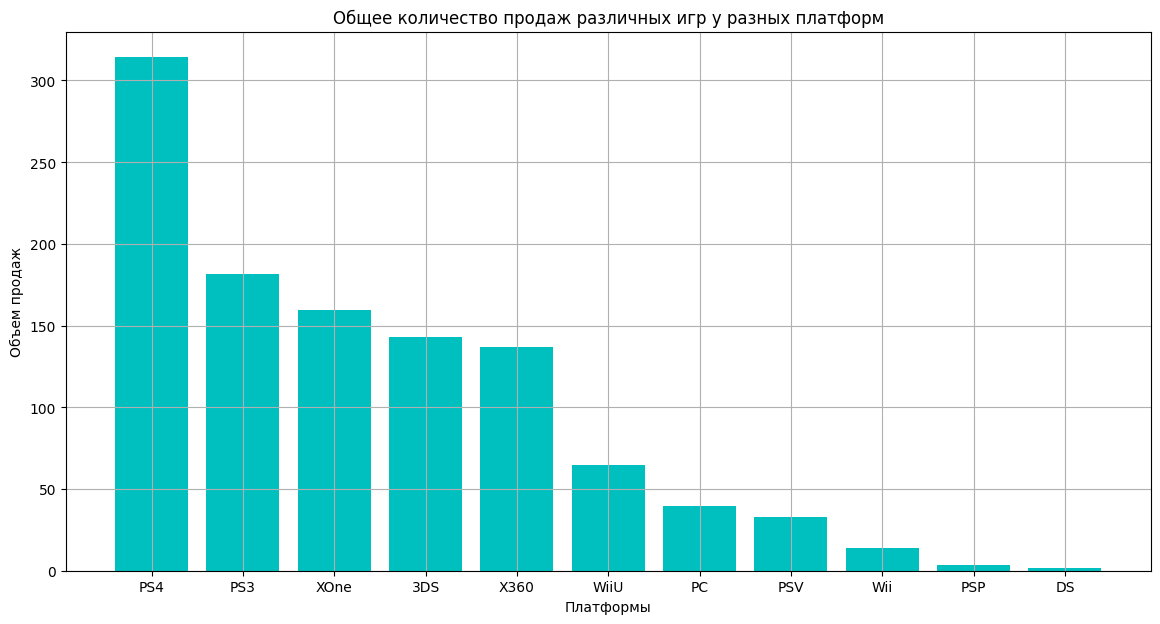

In [45]:
x = df1.index
y = df1['all_sales']

fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(x, y, color ='c')

fig.set_figwidth(14)    
fig.set_figheight(7)
plt.grid()
plt.title('Общее количество продаж различных игр у разных платформ')
plt.xlabel('Платформы')
plt.ylabel('Объем продаж')

plt.show()

In [46]:
b = ['PS3','X360','PS4','3DS','XOne']
data.query('platform in @b').pivot_table(index='platform',columns='year',values='all_sales',aggfunc='sum').fillna('-')

year      2005   2006   2007    2008    2009    2010    2011    2012    2013  \
platform                                                                       
3DS          -      -      -       -       -       -    63.2   51.36   56.57   
PS3          -  20.96  73.19  118.52  130.93  142.17  156.78  107.36  113.25   
PS4          -      -      -       -       -       -       -       -   25.99   
X360      8.25  51.62  95.41  135.26  120.29  170.03  143.84   99.74   88.58   
XOne         -      -      -       -       -       -       -       -   18.96   

year        2014    2015   2016  
platform                         
3DS        43.76   27.78  15.14  
PS3        47.76   16.82   3.60  
PS4       100.00  118.90  69.25  
X360       34.74   11.96   1.52  
XOne       54.07   60.14  26.15

Как видно, эти платформы появились в 2005 и 2013 годах (кроме PS3, X360 и 3DS - они начали свою деятельность еще в 1990-2000, при том, что основная работа у них пошла в 2005/2011 годах соответственно). При том, 3DS, PS3 и X360 - теряют популярность среди пользователей (скорее всего PS3 теряет популярность из-за появления более свежей версии платформы - PS4, как и X360-XOne), а остальные две - наоборот - набирают (их преемники). И как раз являются одними из самых потенциально прибыльных.

P.S. Обращать внимание нужно не только полностью на показатели 2016 года, а смотреть в динамике, т.к. данные за 2016 год могут быть заполнены не до конца.

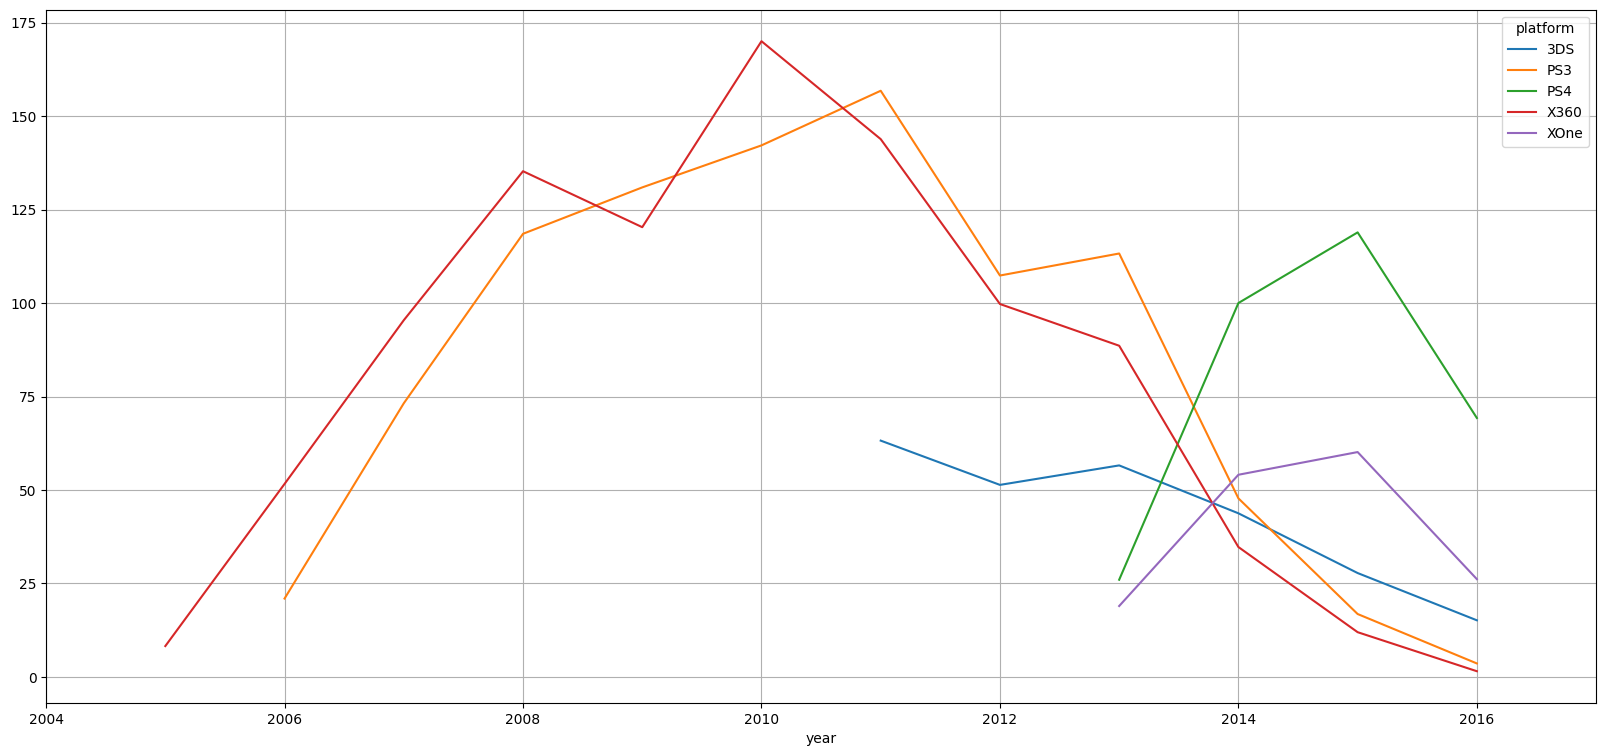

In [47]:
data[data['platform'].isin(b)].pivot_table(index='year',columns='platform', values='all_sales',aggfunc='sum')\
.plot(figsize=(20,9),xlim=(2004,2017),grid=True);

На графике четко видно, как изменялись продажи у разных платформ. Например, в 2010 году на пике популярности была **X360**, 2011 - **PS3**, которая держала превосходство до 2013 года, однако в 2014 уже вырвалась в лидеры её преемница - **PS4**.

Исходя из этих данных - можно сказать, что самыми потенциально прибыльными платформами можно назвать **PS4 и XOne**.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [48]:
df.groupby('platform')[['all_sales']].describe()

all_sales                                                        
             count      mean       std   min     25%    50%     75%    max
platform                                                                  
3DS          303.0  0.472772  1.381347  0.01  0.0400  0.090  0.2800  14.60
DS             8.0  0.192500  0.172026  0.03  0.0675  0.150  0.2525   0.51
PC           189.0  0.208624  0.352304  0.01  0.0300  0.080  0.2300   3.05
PS3          345.0  0.525884  1.451939  0.01  0.0400  0.150  0.5100  21.05
PS4          392.0  0.801378  1.609456  0.01  0.0600  0.200  0.7300  14.63
PSP           67.0  0.052239  0.059768  0.01  0.0150  0.020  0.0700   0.24
PSV          358.0  0.092151  0.153816  0.01  0.0200  0.040  0.1100   1.96
Wii           23.0  0.593913  0.915432  0.01  0.0450  0.180  0.7550   3.58
WiiU         115.0  0.562000  1.038778  0.01  0.0600  0.200  0.5950   7.09
X360         186.0  0.735484  1.663275  0.01  0.0800  0.265  0.7950  16.27
XOne         247.0  0.645020  1.036139  0.01  0.0600  0.220  0.6850   7.39

In [49]:
fig = px.box(df, x='platform', y='all_sales',range_y=[0,3],points='all')
fig.update_layout(title="Распределение продаж по платформам",
                  xaxis_title="Платформа",
                  yaxis_title="Объем продаж")
fig.show()

Здесь наглядно представлены и медианы и "ящики" (пределы большинства значений) каждой платформы. Самое большой разброс и также самое большое значение медианы - у *X360*.

**PS3, PS4, XOne** а также **WiiU** идут примерно на одном уровне медиан - разница только в разбросе границ квартилей.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

В качестве платвормы для оценки зависимости между продажами и отзывами пользователей и критиков возьму самую популярную - PS4

In [50]:
df_ps4 = df[df['platform']=='PS4'].copy()
df_ps4

name platform  year         genre  na_sales  \
31          Call of Duty: Black Ops 3      PS4  2015       Shooter      6.03   
42                 Grand Theft Auto V      PS4  2014        Action      3.96   
77                            FIFA 16      PS4  2015        Sports      1.12   
87       Star Wars Battlefront (2015)      PS4  2015       Shooter      2.99   
92     Call of Duty: Advanced Warfare      PS4  2014       Shooter      2.81   
...                               ...      ...   ...           ...       ...   
16500                     Root Letter      PS4  2016     Adventure      0.00   
16503               Shin Hayarigami 2      PS4  2016     Adventure      0.00   
16526                      Dungeons 2      PS4  2016  Role-Playing      0.01   
16530         Carmageddon: Max Damage      PS4  2016        Action      0.01   
16585   Farming 2017 - The Simulation      PS4  2016    Simulation      0.00   

       eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
31         5.86      0.36         2.38           NaN         NaN    NaN   
42         6.31      0.38         1.97          97.0         8.3      M   
77         6.12      0.06         1.28          82.0         4.3      E   
87         3.49      0.22         1.28           NaN         NaN    NaN   
92         3.48      0.14         1.23          83.0         5.7      M   
...         ...       ...          ...           ...         ...    ...   
16500      0.00      0.01         0.00          69.0         7.5    NaN   
16503      0.00      0.01         0.00           NaN         NaN    NaN   
16526      0.00      0.00         0.00          61.0         7.9      T   
16530      0.00      0.00         0.00          51.0         5.5      M   
16585      0.01      0.00         0.00           NaN         NaN    NaN   

       all_sales  
31         14.63  
42         12.62  
77          8.58  
87          7.98  
92          7.66  
...          ...  
16500       0.01  
16503       0.01  
16526       0.01  
16530       0.01  
16585       0.01  

[392 rows x 12 columns]

In [51]:
df_ps4[['all_sales','user_score','critic_score']].corr()

all_sales  user_score  critic_score
all_sales      1.000000   -0.031957      0.406568
user_score    -0.031957    1.000000      0.557654
critic_score   0.406568    0.557654      1.000000

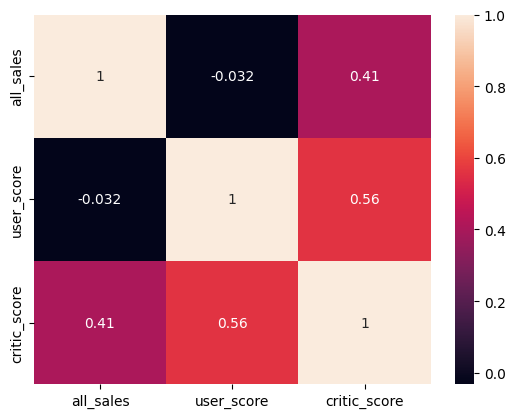

In [52]:
sns.heatmap(df_ps4[['all_sales','user_score','critic_score']].corr(),annot=True);

На хитмэпе и матрице корреляции видно, что оценка критиков бОльше влияет на продажи, чем оценка критиков, однако нельзя судить о четкой прямой зависимости между этими категориями. Также видно, что есть некая зависимость между оценкой критиков и оценков пользователей - показатель зависимости 0.56

In [53]:
df_ps4

name platform  year         genre  na_sales  \
31          Call of Duty: Black Ops 3      PS4  2015       Shooter      6.03   
42                 Grand Theft Auto V      PS4  2014        Action      3.96   
77                            FIFA 16      PS4  2015        Sports      1.12   
87       Star Wars Battlefront (2015)      PS4  2015       Shooter      2.99   
92     Call of Duty: Advanced Warfare      PS4  2014       Shooter      2.81   
...                               ...      ...   ...           ...       ...   
16500                     Root Letter      PS4  2016     Adventure      0.00   
16503               Shin Hayarigami 2      PS4  2016     Adventure      0.00   
16526                      Dungeons 2      PS4  2016  Role-Playing      0.01   
16530         Carmageddon: Max Damage      PS4  2016        Action      0.01   
16585   Farming 2017 - The Simulation      PS4  2016    Simulation      0.00   

       eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
31         5.86      0.36         2.38           NaN         NaN    NaN   
42         6.31      0.38         1.97          97.0         8.3      M   
77         6.12      0.06         1.28          82.0         4.3      E   
87         3.49      0.22         1.28           NaN         NaN    NaN   
92         3.48      0.14         1.23          83.0         5.7      M   
...         ...       ...          ...           ...         ...    ...   
16500      0.00      0.01         0.00          69.0         7.5    NaN   
16503      0.00      0.01         0.00           NaN         NaN    NaN   
16526      0.00      0.00         0.00          61.0         7.9      T   
16530      0.00      0.00         0.00          51.0         5.5      M   
16585      0.01      0.00         0.00           NaN         NaN    NaN   

       all_sales  
31         14.63  
42         12.62  
77          8.58  
87          7.98  
92          7.66  
...          ...  
16500       0.01  
16503       0.01  
16526       0.01  
16530       0.01  
16585       0.01  

[392 rows x 12 columns]

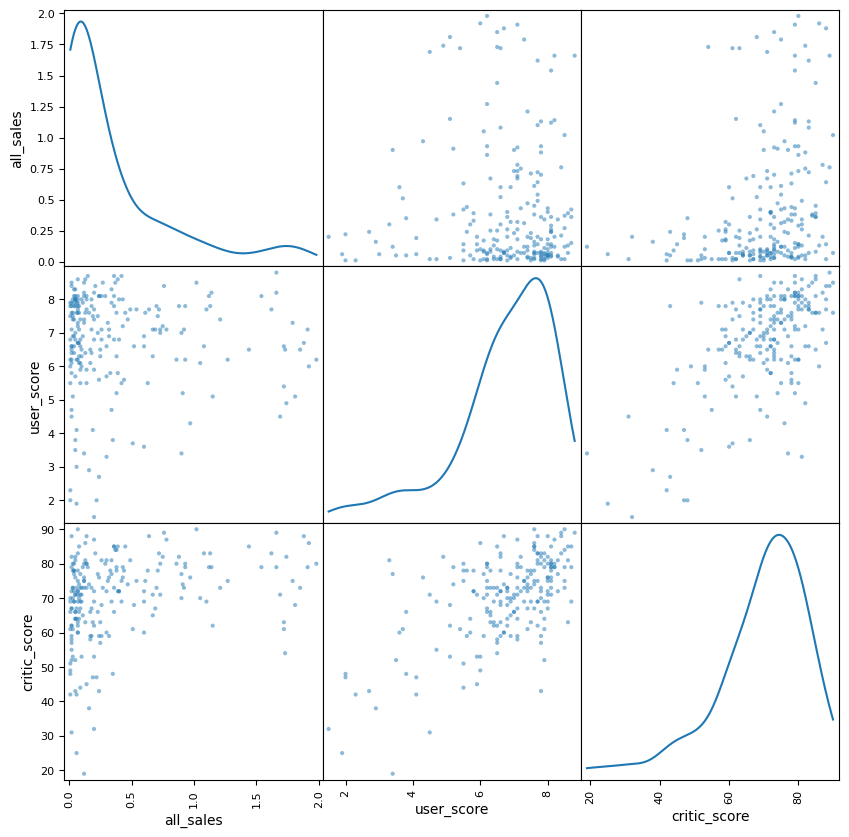

In [54]:
df4 = df_ps4[df_ps4['all_sales']<=2][['all_sales','user_score','critic_score']]
pd.plotting.scatter_matrix(df4,figsize=(10,10),diagonal='kde');

Перед тем, как строить график, я убрала выбросы, чтобы можно было четче отследить зависимость.

На матрице рассеивания видно, что:

- игры с низкими оценками пользователей чаще всего не получают широкого распространения, и чем выше оценка - тем больше продаж. Однако достаточно много "выстреливающих" игр, которые не смотря на среднюю (и даже низкую для своего ценового класса) стоимость - имеют высокий объем продаж

- игры с низкими оценками критиков практически вообще не получают широкого распространения и надежды на поднятие стоимости.

- больше всего игр набирают средне-высокую (7-8 баллов из 10) оценку пользователей, и такую же оценку критиков (70-80 баллов из 100)


Также, на диагонали мы показали плоность распределения по группе.

### Соотнесите выводы с продажами игр на других платформах.

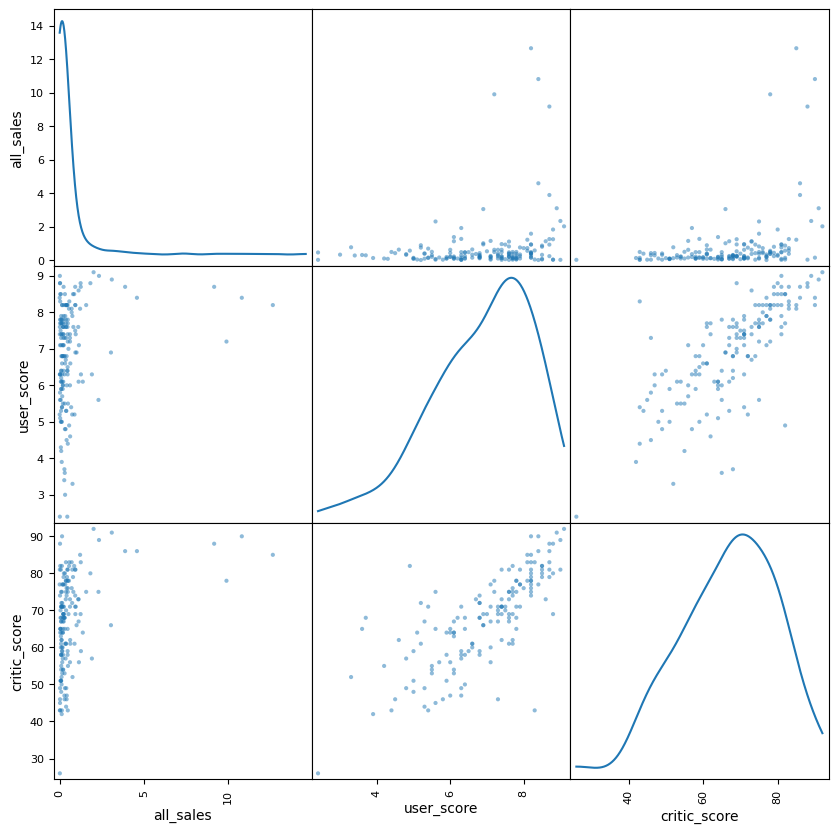

In [55]:
pd.plotting.scatter_matrix(data[data['platform']=='3DS'][['all_sales','user_score','critic_score']],
                           figsize=(10,10),diagonal='kde');

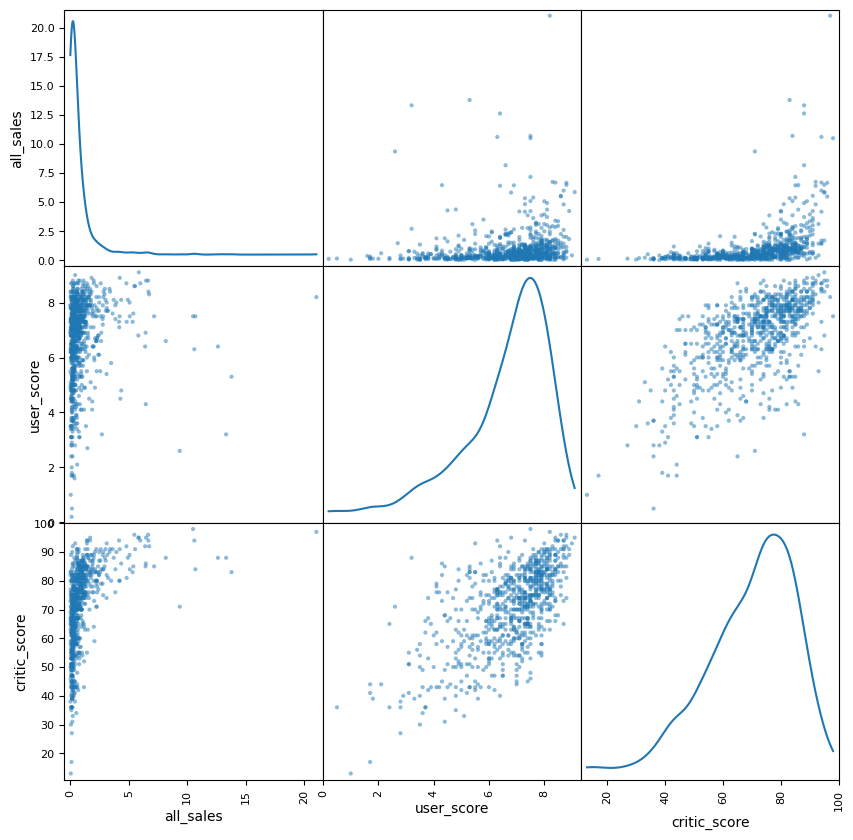

In [56]:
pd.plotting.scatter_matrix(data[data['platform']=='PS3'][['all_sales','user_score','critic_score']],
                           figsize=(10,10),diagonal='kde');

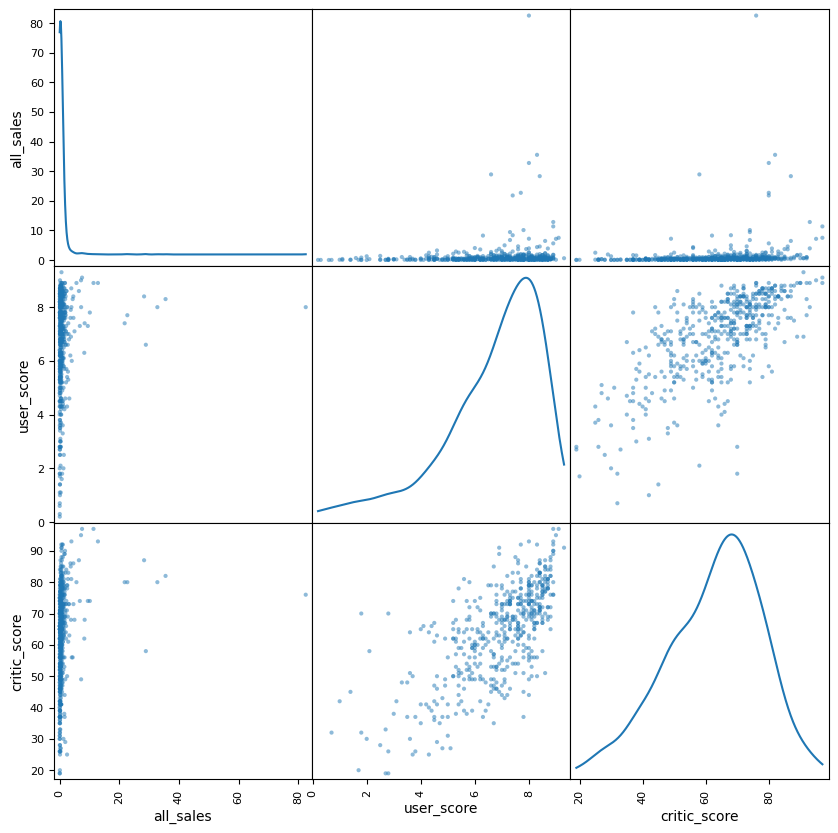

In [57]:
pd.plotting.scatter_matrix(data[data['platform']=='Wii'][['all_sales','user_score','critic_score']],
                           figsize=(10,10),diagonal='kde');

Для сопоставления выводов с другими платформами я взяла в пример 3 платформы из *изначального* датасета.

Как мы видим, распределение по матрице корреляции у всех схоже - где то больше продаж, где то меньше, но "костяк графика" - один и тот же, соответственно, те же выводы, что мы делали с PS3, мы можем сделать и с остальными платформами.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [58]:
df_1 = data.groupby('genre')[['all_sales']].agg('count').sort_values('all_sales',ascending=False).reset_index()

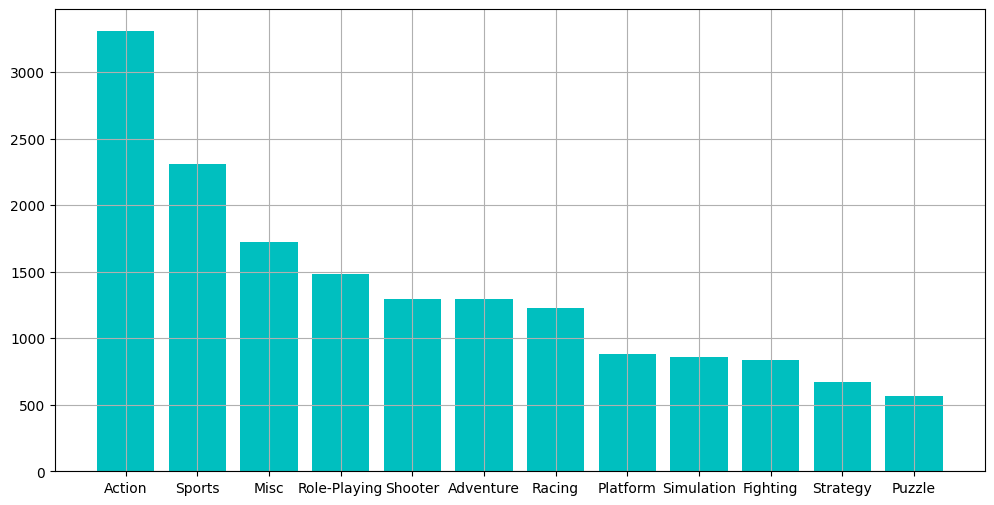

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(df_1['genre'], df_1['all_sales'], color='c')

fig.set_figwidth(12)    
fig.set_figheight(6)
plt.grid()
plt.show()

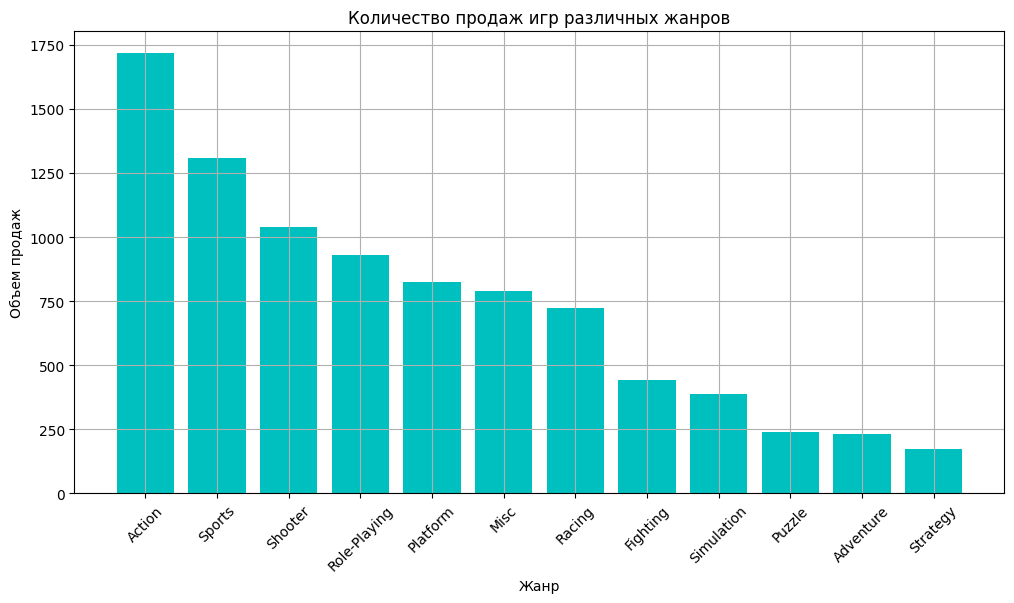

In [61]:
df_n = data.groupby('genre')[['all_sales']].sum().sort_values('all_sales',ascending=False)
x = df_n.index
y = df_n['all_sales']

fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(x, y, color='c')

fig.set_figwidth(12)    
fig.set_figheight(6)
plt.grid()
plt.xlabel('Жанр')
plt.ylabel('Объем продаж')
plt.title('Количество продаж игр различных жанров')
plt.xticks(rotation=45)

plt.show()

Бесспорный лидер и по количеству выпускаемых игр, и по объему продаж - игры жанра "экшен".

Не смотря на то, что шутеров практически в половину меньше чем спортивных игр, они приносят на четверть меньше общей прибыли, чем шутеры (на 3 месте по продажам). 

Также неплохо себя показали "платформенники", которые при небольшом количестве выпущенных игр - меньше 1000 - приносят доход, сопоставимый с шутерами.

Также, не смотря на то, что игр жанра "misc" выпускается достаточно много, они приносят средний доход - возможно даже низкий для количества игр этого жанра.

Жанры с низкими (относительно остальных) продажами - драки, симуляции, головоломки, приключенческие и стратегии.

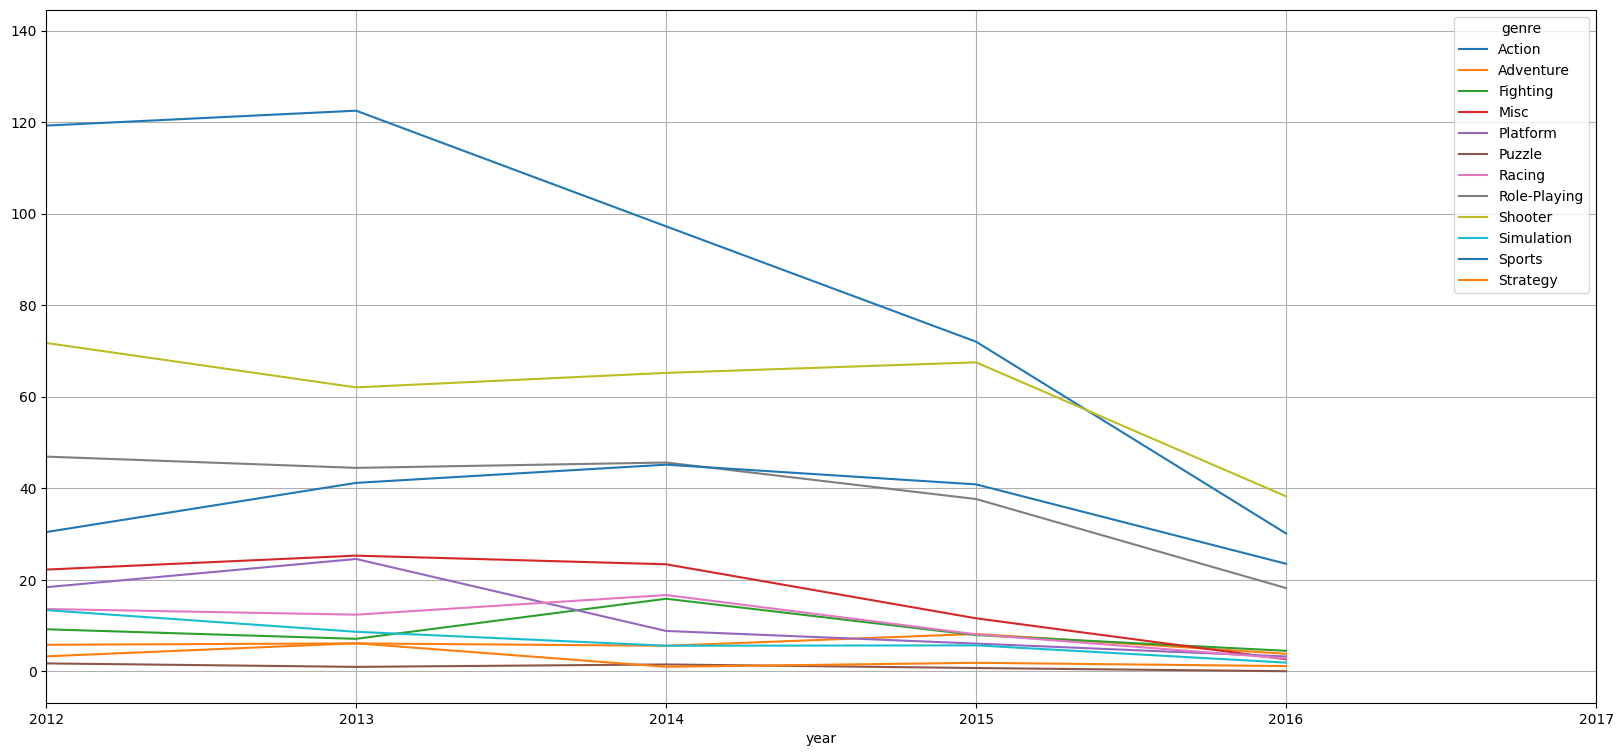

In [62]:
g = ['Action','Sports','Shooter','Role-Playing','Misc','Platform']
data.pivot_table(index='year',columns='genre', values='all_sales',aggfunc='sum')\
.plot(figsize=(20,9),xlim=(2012,2017),grid=True);

### Промежуточный вывод:

За последний год мы наблюдаем тенденцию к тому, что общее число покупок снижается, поэтому крайне важно непрогадать с выбором игры, а если получится - набрать пару вариантов в запас. Самый ходовой жанр - экшен-игры, за ним идет шутеры и симуляторы спорта.

## Шаг 4. Составьте портрет пользователя каждого региона

### Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Портрет пользователя в Северной Америке:

In [63]:
fig = px.pie(df, values='na_sales', names='platform', color_discrete_sequence=px.colors.sequential.RdBu,
             title='Распределение игр по платформам в Америке')
fig.show()

In [64]:
fig = px.pie(df, values='na_sales', names='genre', color_discrete_sequence=px.colors.sequential.RdBu,
             title='Распределение игр по жанрам в Америке')
fig.show()

Cреди пользователей из Северной Америки популярнее всего платформа - PS4 - практически четверть всех проданных игр в этом регионе принадлежит играм для этой платформы. Топ-5 всех платформ также представлены в первой диаграмме. 

Во второй диаграмме представлены суммарные продажи каждого жанра в Северной Америке. В топ 5 входят: экшен (практически 29% от всех игр, популярных в этом регионе), шутеры, симуляторы спортивных игр, рп и многопользовательские шутеры.

Небольшое обобщение: для рынка Америки самый подходящий проект - игра жанра экшен на приставку PS4.

### Портрет пользователя в Европе:

In [65]:
fig = px.pie(df, values='eu_sales', names='platform', color_discrete_sequence=px.colors.sequential.RdBu,
             title='Распределение игр по платформам в Европе')
fig.show()

In [66]:
fig = px.pie(df, values='eu_sales', names='genre', color_discrete_sequence=px.colors.sequential.RdBu,
             title='Распределение игр по жанрам в Европе')
fig.show()

Первое что бросается в глаза - что общее число продаж в Европе меньше, чем в Северной Америке. 

Здесь также популярнее всего приставки Play Station - 3 и 4 версии. Также в топ-5 входят X-box (360, XOne) и 3DS

Ну а среди лидеров продаж - игры жанра экшен, шутеры, симуляторы спортивных игр, рп и гонки.

### Портрет пользователя в Японии:

In [67]:
fig = px.pie(df, values='jp_sales', names='platform', color_discrete_sequence=px.colors.sequential.RdBu,
             title='Распределение игр по платформам в Японии')
fig.show()

In [68]:
fig = px.pie(df, values='jp_sales', names='genre', color_discrete_sequence=px.colors.sequential.RdBu,
             title='Распределение игр по жанрам в Японии')
fig.show()

Cреди пользователей из Японии популярнее всего платформа - 3DS - практически половина всей аудитории Японии использует эту приставку. 

Среди жанров в Японии популярнее всего рп игры, затем уже идут экшен, многопользовательские шутеры, драки и шутеры.

Небольшое обобщение: для рынка Японии самый подходящий проект - игра жанра role-play на приставку.

### Портрет пользователя в остальных странах:

In [69]:
fig = px.pie(df, values='other_sales', names='platform', color_discrete_sequence=px.colors.sequential.RdBu,
             title='Распределение игр по платформам в других странах')
fig.show()

In [70]:
fig = px.pie(df, values='other_sales', names='genre', color_discrete_sequence=px.colors.sequential.RdBu,
             title='Распределение игр по жанрам в других странах')
fig.show()

Среди пользователей других стран - распределение по платформам очень похоже на Европейское.

В жанрах преобладает экшен.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

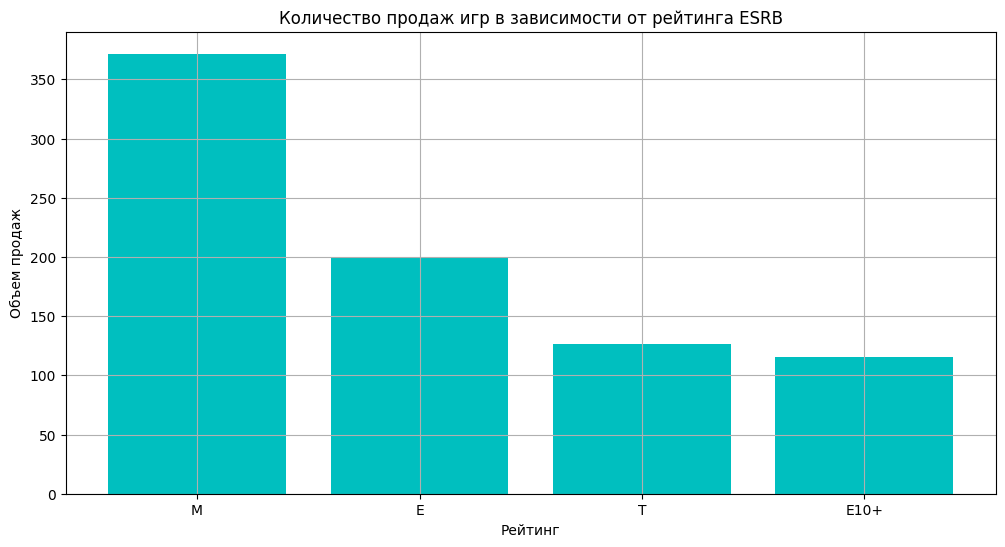

In [71]:
df3 = df.groupby('rating')[['all_sales']].sum().sort_values('all_sales',ascending=False)
x = df3.index
y = df3['all_sales']

fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(x, y, color='c')

fig.set_figwidth(12)    
fig.set_figheight(6)
plt.grid()
plt.xlabel('Рейтинг')
plt.ylabel('Объем продаж')
plt.title('Количество продаж игр в зависимости от рейтинга ESRB')

plt.show()

Исходя из тех данных, что у нас есть - наиболее часто продаваемые игры - жанра M (для взрослых). Далее - игры для всех возврастов (Е), игры для тинейджеров 13+ (Т) и игры для всех от 10 лет (Е10+). Думаю, о какой-либо прямой и четкой корреляции тут речь не идет, потому как и взрослое население очень хорошо играть в компьютерные игры (и не только)

In [73]:
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs=specs)
colors = ['#EF553B', '#00CC96', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']
fig.add_trace(go.Pie(labels=df['rating'], values=df['na_sales'], name='America', marker_colors=colors), 1, 1)
fig.add_trace(go.Pie(labels=df['rating'], values=df['eu_sales'], name='Europe',marker_colors=colors), 1, 2)
fig.add_trace(go.Pie(labels=df['rating'], values=df['jp_sales'], name='Japan',marker_colors=colors), 2, 1)
fig.add_trace(go.Pie(labels=df['rating'], values=df['other_sales'], name='Others',marker_colors=colors), 2, 2)

fig.update_layout(height=800, width=800, title_text="Распределение по рейтингу")

fig.show()

Смотря на эти диаграммы, сделать вывод можно, но сложно - очень много пропусков в данных(они вторые по проценту среди всех групп рейтинга). Однако, среди того, что есть - во всех регионах, кроме Японии - преобладает рейтинг **M** - жанры для взрослых. В Японии - **Т** - подросткам от 13 лет.

### Промежуточный вывод:

Среди всех направлений света, в топ-5 жанров игр 100% входят игры жанра экшен и шутеры. Это два самых основных жанра, которые встречаются везде. Далее по частоте - role-playing, misc, sports. 

Япония сильнее всего отличается от всего остального мира. (или правильней сказать что весь мир очень похож друг на друга, кроме Японии). Но в любом случае, наблюдается тенденция к уменьшению покупок игр.

In [74]:
colors = ['rgb(103,0,31)', 'rgb(178,24,43)', 'rgb(214,96,77)', 'rgb(244,165,130)', 'rgb(253,219,199)', 'rgb(247,247,247)', 
          'rgb(209,229,240)', 'rgb(146,197,222)', 'rgb(67,147,195)', 'rgb(33,102,172)', 'rgb(5,48,97)']

In [75]:
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs=specs)

fig.add_trace(go.Pie(labels=df['platform'], values=df['na_sales'], name='America', marker_colors=colors), 1, 1)
fig.add_trace(go.Pie(labels=df['platform'], values=df['eu_sales'], name='Europe',marker_colors=colors), 1, 2)
fig.add_trace(go.Pie(labels=df['platform'], values=df['jp_sales'], name='Japan',marker_colors=colors), 2, 1)
fig.add_trace(go.Pie(labels=df['platform'], values=df['other_sales'], name='Others',marker_colors=colors), 2, 2)

fig.update_layout(height=800, width=800, title_text="Распределение по платформам")

fig.show()

In [76]:
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs=specs)

fig.add_trace(go.Pie(labels=df['genre'], values=df['na_sales'], name='America', marker_colors=colors), 1, 1)
fig.add_trace(go.Pie(labels=df['genre'], values=df['eu_sales'], name='Europe',marker_colors=colors), 1, 2)
fig.add_trace(go.Pie(labels=df['genre'], values=df['jp_sales'], name='Japan',marker_colors=colors), 2, 1)
fig.add_trace(go.Pie(labels=df['genre'], values=df['other_sales'], name='Others',marker_colors=colors), 2, 2)

fig.update_layout(height=800, width=800, title_text="Распределение по жанрам")

fig.show()

Все таки, Япония - страна, которая кардинально отличается от всего остального мира - как мы видим, показатели в Европе, Америке и других странах сохраняют общую тенденцию - преобладают экшен игры на Ps4, а вот в Японии - role-play на приставке.

## 📊 Шаг 5. Проверьте гипотезы
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.    

### 📊 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

В данном случае, нулевая гипотеза - ***средние пользовательские оценки платформ XOne и PC - одинаковые***. Альтернативная гипотеза - то, что они **неодинаковы**.

In [77]:
sample1 = df[df['platform']=='XOne']['user_score'].notna() # задаем первый датафрейм
sample2 = df[df['platform']=='PC']['user_score'].notna() # второй

results = st.ttest_ind(sample1,sample2)

print('полученное p-value:', results.pvalue)

alpha = 0.05 # определяем пороговое значение

if results.pvalue < alpha:
    print('Отвергаем гипотезу Н_0')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

полученное p-value: 0.03981358558167057
Отвергаем гипотезу Н_0


Это означает, что из всей выборки вероятность встретить результат, когда они равны составляет 3.23...%. И получается, гипотеза отвергает возможность того, что оценки равны. Нулевую гипотезу мы **отвергаем** в пользу альтернативной.

### 📊 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [78]:
sample1 = df[df['genre']=='Action']['user_score'].notna()
sample2 = df[df['genre']=='Sports']['user_score'].notna()
results = st.ttest_ind(sample1,sample2)

print('полученное p-value:', results.pvalue)

alpha = 0.05

if results.pvalue < alpha:
    print('Отвергаем гипотезу Н_0')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

полученное p-value: 2.8887406123185774e-10
Отвергаем гипотезу Н_0


Здесь же нулевая гипотеза звучит следующим образом: *средние пользовательские рейтинги двух разных жанров разные.* Альтернативная: ***средние пользовательские рейтинги одинаковые***. И полученное pvalue нам говорит о том, что среди этих датафремов с вероятностью 3.9004 * 10^(-10)% мы встретим разные средние рейтинги.

## Шаг 6. Общий вывод

В начале работы мы ставили целью выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Проведя анализ исходных данных, подготовив их для исследования,приведя колонки к snake_case, заполнив возможные пропуски и убрав выбивающиеся значения, мы изучили вопрос с разных сторон и сделали вывод, что успешность игры определяется популярностью платформы и жанра в том или ином регионе. 

Для разных регионов:

- Америка: PS4, Action
- Европа: PS4, Action
- Япония: 3DS, Role-Playing
- Другие страны: PS4, Action

Исходя из этого делаем вывод, что преобладающая платформа и жанр - PS4, Action - следовательно, вероятность "выстрелить" именно такой игры - гораздо выше. Однако ставить все только на одну игру - нецелесообразно. Я бы предложила в качестве платформ также рассматривать XOne и 3DS (если направлены на Японский рынок) и несколько жанров - Shooter, Role-Playing и Misc.

Также, можно заметить, что оценка критиков бОльше влияет на распространение и спрос на игру (чем оценка игроков), соответственно, этот фактор тоже стоит учитывать при планировании рекламной компании.

Также мы проверили 2 гипотезы и пришли к выводу, что:
- средние пользовательские рейтинги платформ Xbox One и PC имеют сильные различия
- cредние пользовательские рейтинги жанров Action и Sports схожи